---
<h3 align=center><strong><em>Analyse sur le terrible drame du Titanic</em></strong></h3>

---


<center><img src="image.png" width="300" height="200"></center>




<h4><em>Le naufrage du Titanic a mis fin à la traversée inaugurale du RMS Titanic, un paquebot qui devait relier Southampton à New York. Il se déroule dans la nuit du </em><font color="blue">14 au 15 avril 1912 </font><em>dans l'océan Atlantique Nord au large de Terre-Neuve. Le navire heurte un iceberg sur tribord le dimanche 14 avril 1912 à 23 h 40 et coule en moins de trois heures, à 2 h 20. </em><font color="blue">Entre 1 490 et 1 520 personnes périssent</font>,<em> ce qui fait de ce naufrage l'une des plus grandes catastrophes maritimes en temps de paix et la plus meurtrière pour l'époque.</em></h4>
<h5><blockquote><p><em>Les passagers :</em></p>
<blockquote>
<ul><li>Southampton : 922 passagers</li>
<li>Cherbourg : 274 passagers</li>
<li>Queenstown : 120 passagers</li>
</ul></blockquote>
<em>L'équipage :</em>
<blockquote>
<ul><li>Equipage de pont : 66</li>
<li>Mécaniciens : 325</li>
<li>Personnel hôtelier : 494</ul></blockquote></blockquote>


---
<h3>Pour faire cette analyse nous allons utiliser un dataset composé de 1309 individus, récupérable <a href="https://github.com/MachineLearnia/Python-Machine-Learning/tree/master/Dataset">ici</a>. L'analyse des données sera portée sur la probabilité de survie suivant les différentes variables disponibles.</h3>
  
---

<center><h2><u>SOMMAIRE (liens cliquables)</u></h2></center>
<h3><ol>
    <li><a href="#1">Importation et exploration du dataset</a></li><br>
    <li><a href="#2">Suppression des variables inutiles et ajustement des autres</a></li>
        <ul>
        <li><a href="#a">a) Les lieux d'embarquement</a></li>
        <li><a href="#b">b) Vérification qu'il n'y ait pas 2 fois le même passager</a></li>
        <li><a href="#c">c) Suppression des variables inutiles</a></li>
        <li><a href="#d">d) Le prix du ticket manquant</a></li>
        <li><a href="#e">e) Les ages</a></li>
        <li><a href="#f">f) Vérification que la table est prête</a></li>
        </ul><br>
    <li><a href="#3">Etude et visualisation du jeu de données</a></li>
        <ul>
        <li><a href="#3a">a) Les lieux d'embarquement</a></li>
        <li><a href="#3b">b) En fonction du sex</a></li>
        <li><a href="#3c">c) Par classe</a></li>
        <li><a href="#3d">d) En fonction de l'age</a></li>
        <li><a href="#3e">e) Par port 'embarcation</a></li>
        <li><a href="#3f">f) Les fréres et soeurs et conjoints</a></li>
        <li><a href="#3g">g) Parents et enfants</a></li>
        <li><a href="#3h">h) De célibataire à grande famille</a></li>
        <li><a href="#3h">i) Prix du ticket</a></li>
        </ul><br>
    <li><a href="#4">Conclusions </a></li><br>
    <li><a href="#5">Correlation entre les variables</a></li>
    </ol>
</h3>

---

<h4><strong><div id="1">  1 : Tout d'abord on importe le fichier et on en visualise les variables disponibles</div></strong></h4>

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")
import numpy as np
import random

data = pd.read_excel('titanic.xls')
data.head(n=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


<h5> <p>On dispose de 14 variables réparties comme suit :
<ul>
<li>pclass : la classe occupée par le passager</li>
<li>survived : le nom du passager</li> 
<li>name : le nom du passager</li> 
<li>sex : le genre du passager</li>
<li>age : l'age en années</li>
<li>sibsp : nombre de frére/soeur ou conjoint</li>
<li>parch : nombre d'enfant ou de parent</li>
<li>ticket : le numéro du ticket</li>
<li>fare : le prix du ticket</li>
<li>cabin : le numéro de chambre</li>
<li>embarked : le lieu d'embarquement</li>
<li>boat : ???</li>
<li>body : ???</li>
<li>home.dest : la destination </li>
</ul></p>
<p> Dans cette première visualisation on peut déjà voir que certaine variable ne nous servirons pas... Il est évidant que le numéro de ticket n'a aucune incidence sur la chance de survie.</p></h5>


In [195]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<h5> Ici plusieures variables contiennent des valeurs nulle => Avant d'analyser quoi que ce soit il faut nettoyer les données. </h5>

<h4><div id="2"><strong>  2 : Suppression des variables inutiles et ajustement des autres </strong></div></h4>

<h5>Les variables inutiles sont : ticket, cabin, boat, body, home.dest<br>
Avant de supprimer ces variables on va essayer de deviner le lieu d'embarcation des 2 passagers où cette information est manque.</h5>

<h5><div id="a">a) Les lieux d'embarquements :</div></h5>

In [196]:
print(data["embarked"].unique())
data[data.loc[:,"embarked"].isnull()]

['S' 'C' nan 'Q']


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


<h6>Icard Amelie semble être un nom francophone => embarked= C<br>George Stone est anglophone => embarked=S</h6>

In [197]:
# les 2 valeurs nan sont embarquées à cherbourg car je n'arrive pas à mettre des valeurs différentes!!! 
# Les tickets ont le même numéro aussi
# et je ne vais pas passer des heures pour 2 passagers
data["embarked"].fillna("C", inplace=True)


<h5><div id="b">b) Vérification qu'il n'y ait pas 2 fois le même passager :</div></h5>

In [198]:
#recherche de lignes dupliquées
data[data.duplicated()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


<h5><div id="c">c) Suppression des variables inutiles</div></h5>

In [199]:
data.drop(["ticket", "cabin", "boat", "body", "home.dest"], axis=1, inplace=True)
data.head(n=0)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked


<h6>La série name n'est pas supprimée car elle sera utile par la suite pour visualiser par catégorie d'ages</h6>

<h5><div id="d">d) Le prix du ticket manquant :</div></h5>

In [200]:
# On va regarder le prix moyen par classe
data.groupby(["pclass"])["fare"].mean()

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64

In [201]:
# En quelle classe se trouve le passager dont le prix du ticket et manquant?
data[data.loc[:,"fare"].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


In [202]:
# On affecte le prix moyen d'un passager en 3éme classe
data["fare"]=data["fare"].fillna(float(13.30))

<h5><div id="e">e) Les ages :</div></h5>

In [203]:
#recherche de valeurs abérantes et visualisation de l'étendu:
print('Le plus agé :',data['age'].max(),'ans')
print('L\'age moyen :',data['age'].mean(),'ans')
print('Le plus jeune :',data['age'].min(),'ans')

Le plus agé : 80.0 ans
L'age moyen : 29.8811345124283 ans
Le plus jeune : 0.1667 ans


<h5>Pour résoudre le problème des valeurs nulles dans la série age on va récuperer la particule de chaque nom présente dans la série name pour l'ajouter dans une nouvelle série initial :</h5>

In [204]:
# on va créer une série afain d'en extraire la particule des passagers :
data['initial']=0
for i in data:
    data['initial']=data.name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
data[data.loc[:,"age"].isnull()]["initial"].value_counts()

Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: initial, dtype: int64

In [205]:
# On peut maintenant visualiser la repartition des titres :
pd.crosstab(data.initial,data.sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


<strong><em><h5>Il y a beaucoup de titre avec peu d'effectif voyons plus en detail la répartition en fonction de l'age</h5></em></strong>

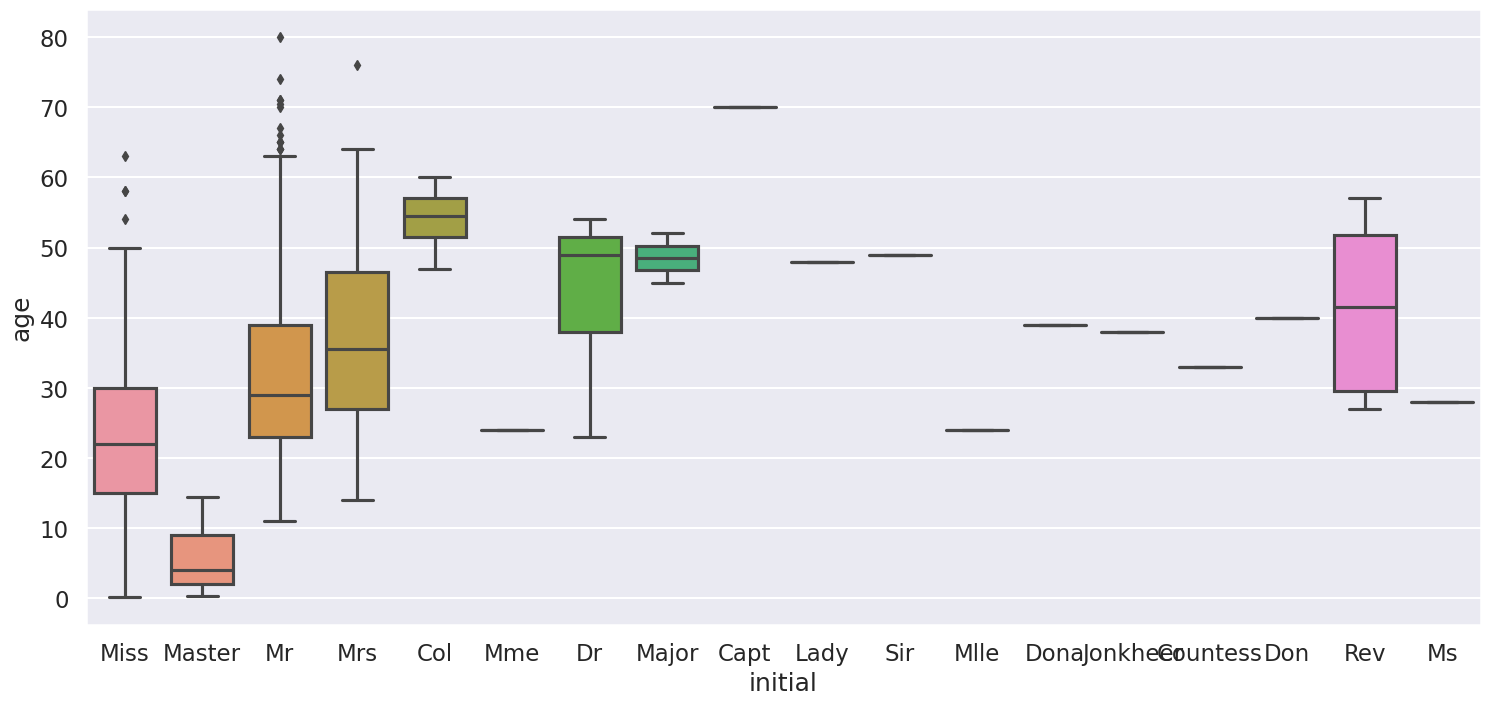

In [206]:
plt.figure(figsize=(18,8))
sns.boxplot(data=data, x=data.loc[:,"initial"], y=data["age"])
plt.show()

<strong><em><h5>On remarque que dans la catégorie Miss il y a environ 25% de l'effectif qui devrait se retrouver dans la catégorie Master...essayons de déduire lesquelles parmis les ages non connus:</h5></em></strong>

In [207]:
# age de valeur nul avec uniquement les miss, uniquement avec des fréres et soeurs en excluant un conjoint et uniquement avec les parents enfants             
data[(data.loc[:,"age"].isnull())&(data.loc[:,"initial"]=="Miss")&(data.loc[:,"sibsp"]>1)&(data.loc[:,"parch"]>0)]

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,initial
955,3,0,"Lefebre, Miss. Ida",female,NaN,3,1,25.4667,S,Miss
956,3,0,"Lefebre, Miss. Jeannie",female,NaN,3,1,25.4667,S,Miss
957,3,0,"Lefebre, Miss. Mathilde",female,NaN,3,1,25.4667,S,Miss
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,69.5500,S,Miss
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,69.5500,S,Miss
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.5500,S,Miss
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,69.5500,S,Miss


<strong><em><h5>Sur les 50 effectifs de la catégorie Miss à valeur nulle on peut en deduire que les 7 passagers ci-dessus peuvent être dans la catégorie Master</h5></em></strong>

In [208]:
master2= data[(data.loc[:,"age"]<=15)&(data.loc[:,"initial"]=="Miss")] # age inferieur à 15 ans dans les ages connues des miss
print("Il y a",master2.shape[0],"Miss agées de moins de 15 ans et dont l'age moyen est de",round(master2["age"].mean(),2),"ans")
print("L'age moyen de la catégorie Master est de",round(data[data.loc[:,"initial"]=="Master"]["age"].mean(),2))

Il y a 54 Miss agées de moins de 15 ans et dont l'age moyen est de 6.59 ans
L'age moyen de la catégorie Master est de 5.48


In [209]:
# Assignation pour les 7 passagers trouvés ci-dessus:
data.loc[(data.age.isnull())&(data.initial=='Miss')&(data.sibsp>1)&(data.parch>0),['age','initial']]=[5.48,'Master']
# Changement de catégorie pour les miss dont l'age est inférieure ou égal à 15 ans :
data.loc[(data.age<=15)&(data.initial=='Miss'),'initial']='Master'

In [210]:
# On va maintenant regrouper les particules afin d'obtenir 4 groupes : Master, Miss, Mrs et Mr 
data['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'],inplace=True)

#Puis on etudie la répartition :
print(data.groupby('initial')['age'].mean())
print(data.groupby('initial')['age'].count())

initial
Master     6.009006
Miss      26.978125
Mr        32.811056
Mrs       37.046243
Name: age, dtype: float64
initial
Master    114
Miss      160
Mr        606
Mrs       173
Name: age, dtype: int64


In [211]:
'''
#--------------------- Impossible à réaliser non plus !!!  --------------------------------------
# Plutôt que d'assigner une valeur moyenne on va utiliser l'ecart interquartile ça évitera d'avoir
# les 176 hommes à valeur nulle au même age

#essai n1
m = pd.Series(data.loc[(data.age.isnull())&(data.initial=='Miss'),"age"],index=[i for i in range(len(data.loc[(data.age.isnull())&(data.initial=='Miss')]))])
print(type(m))
for i in range(len(m)):
    data.loc[m[i],'age']=random.randint(16,30)
    print(data.loc[m[i],"age"])
#essai n2
for i in range(len(data.loc[(data.age.isnull())&(data.initial=='Miss')])):
    data.loc[(data.age.isnull())&(data.initial=='Miss')][:].fillna(random.randint(16,30),limit=1,inplace=True)
#essain3
for i in data:
    if (data.age.isnull())&(data.initial=='Miss'):
        data["age"] = random.randint(16,30)
'''


# Il n'y a plus qu'a assigner sur les valeurs nulles la moyenne en fonction de la fonction qu'occupe un passager 
## et de vérifier que tout a bien été modifier
data.loc[(data.age.isnull())&(data.initial=='Mr'),'age']=33
data.loc[(data.age.isnull())&(data.initial=='Mrs'),'age']=37
data.loc[(data.age.isnull())&(data.initial=='Master'),'age']=6
data.loc[(data.age.isnull())&(data.initial=='Miss'),'age']=27

data[data.loc[:,"age"].isnull()]["initial"].value_counts()

Series([], Name: initial, dtype: int64)

<h5><div id="f">f) Avant de passer à la visualisation graphique on va vérifier que notre table est prête :</div></h5>

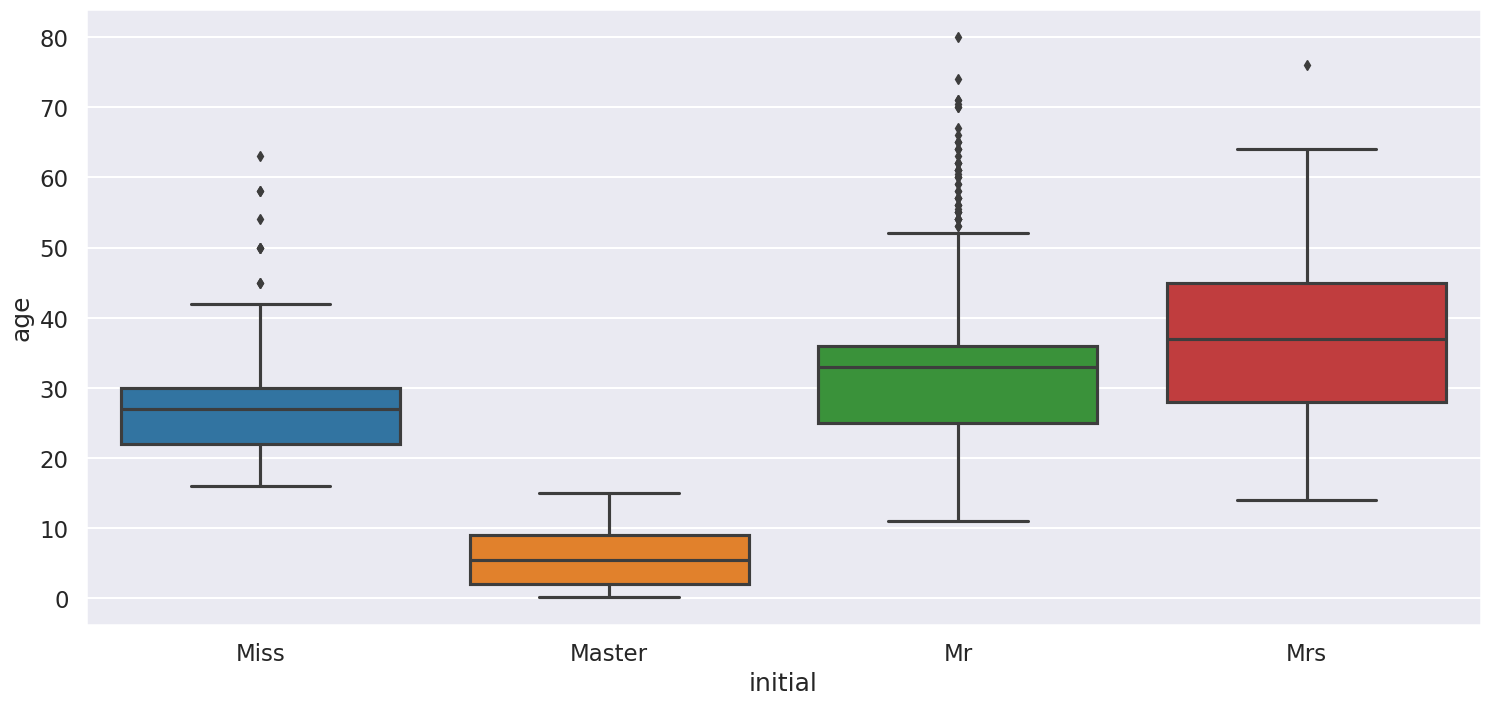

In [212]:
plt.figure(figsize=(18,8))
sns.boxplot(data=data, x=data.loc[:,"initial"], y=data["age"])
plt.show()

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1309 non-null   float64
 8   embarked  1309 non-null   object 
 9   initial   1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


<strong><h5> On aurait pu affiner un peu plus en transférant quelques Mr dans la classe Master...<br>Tout est en ordre let's go !!!</h5></strong>

---
<h4 align=center><div id="3">étude et visualisation du jeu de données</div></h4>

---

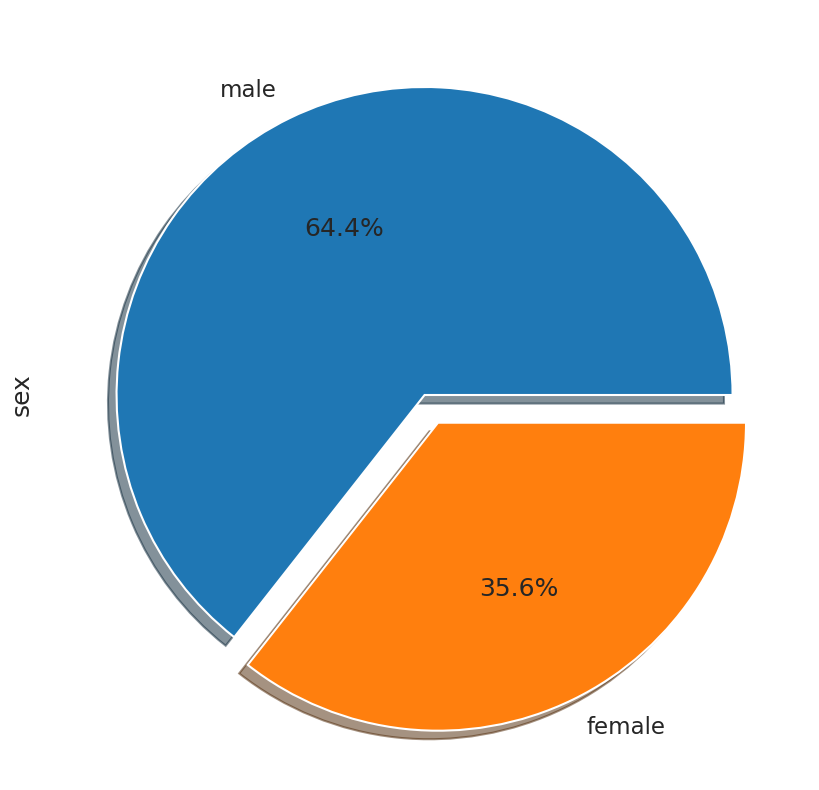

In [214]:
plt.figure(figsize=(10,10))
data['sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

<blockquote><strong><em><h5>Pratiquement 2 passagers sur 3 étaient des hommes.</strong></em></h5></blockquote>

<h4><div id="3a"><u>a) Combien on survécu de manière générale?</u></div></h4>

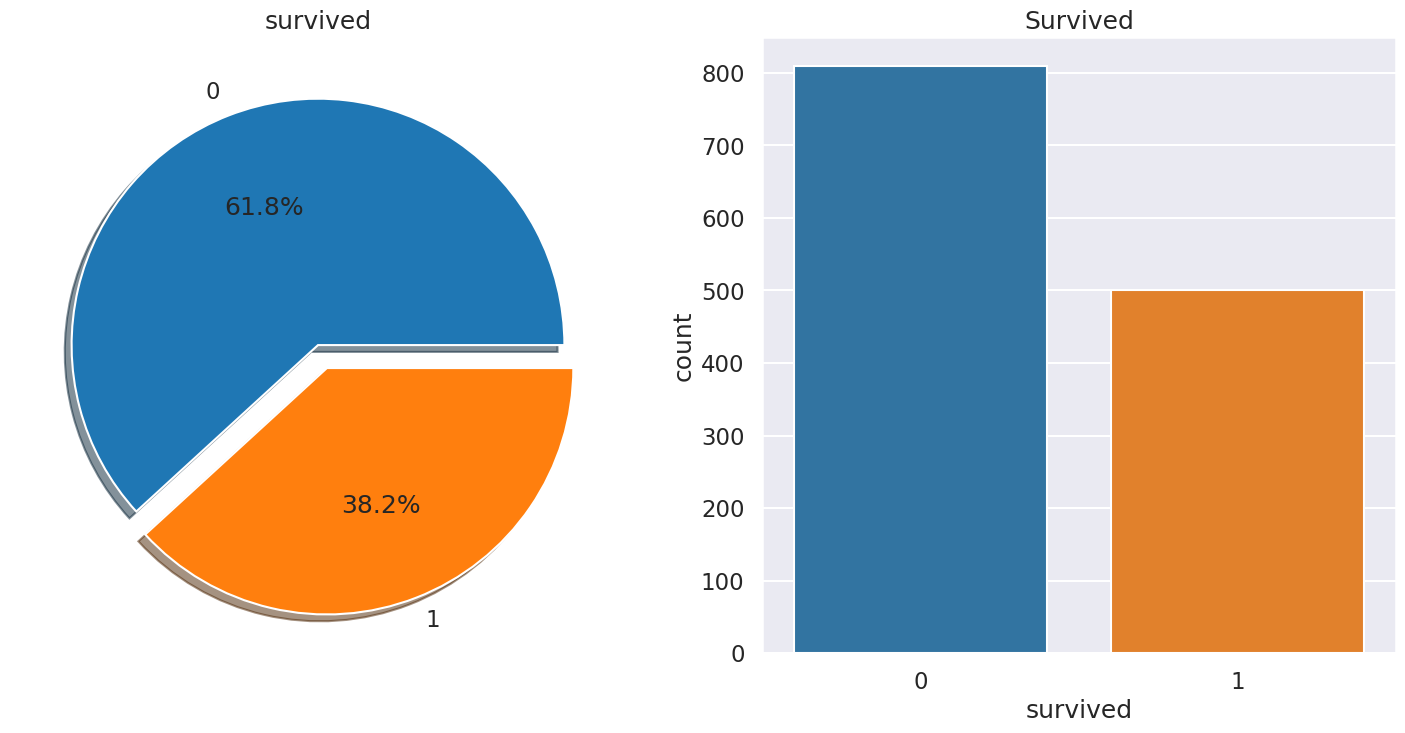

In [215]:

f,ax=plt.subplots(1,2,figsize=(18,8))
data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot(x='survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<blockquote><strong><em><h5>Sur 1309 personnes sur le bateau 61,8% n'ont pas survécu soit environ 800.</h5></em></strong></blockquote>
<h4><div id="3b"><u>b) En fonction du sex :</u></div></h4>

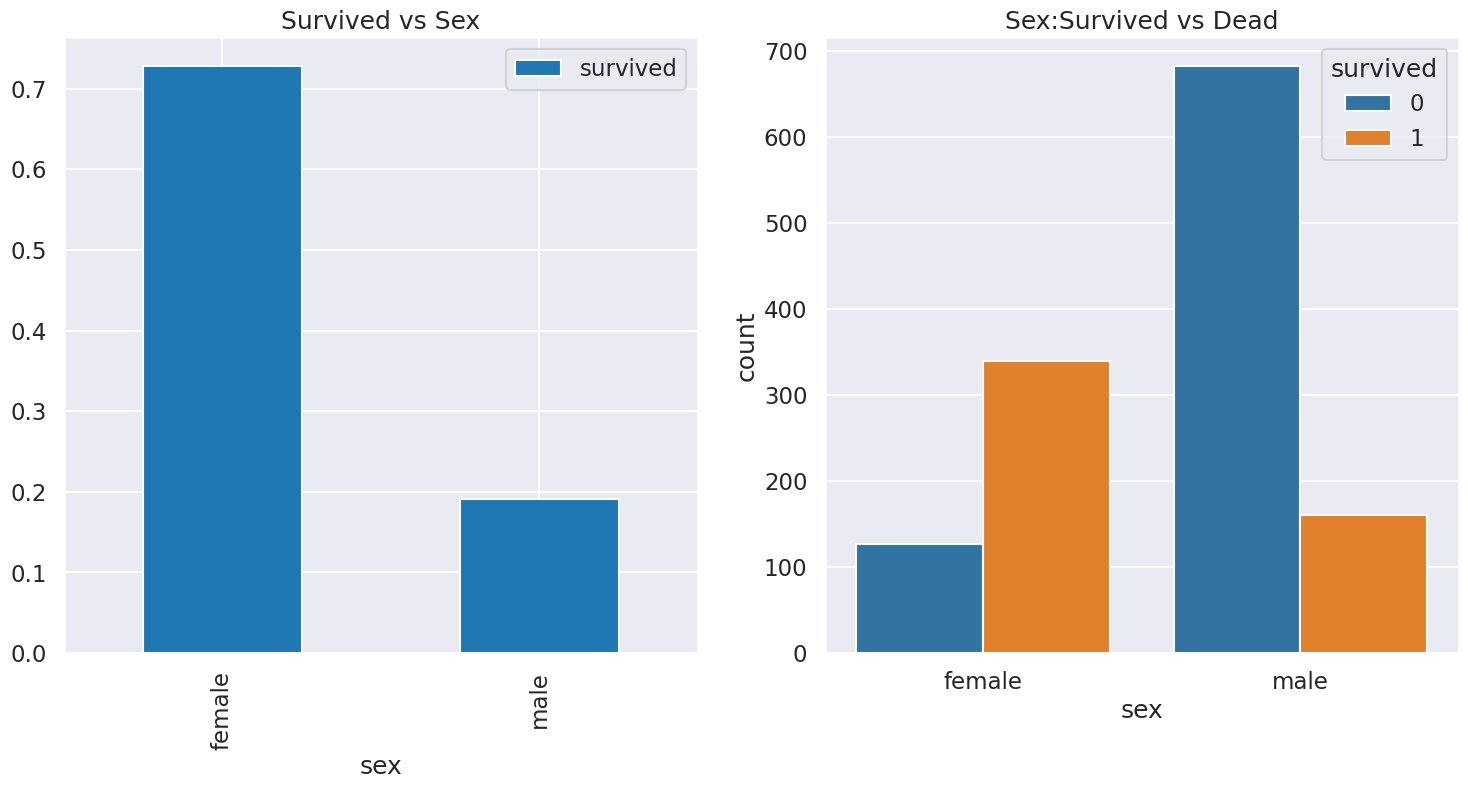

In [216]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['sex','survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='sex',hue='survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

<blockquote><strong><em><h5> Il était préférable d'être une femme sur le Titanic car un peu plus de 70% de sexe féminin ont survécu contre seulement 20% de sexe masculin.</h5></em></strong></blockquote>
<h4><div id="3c"><u>c) Par classe :</u></div></h4>

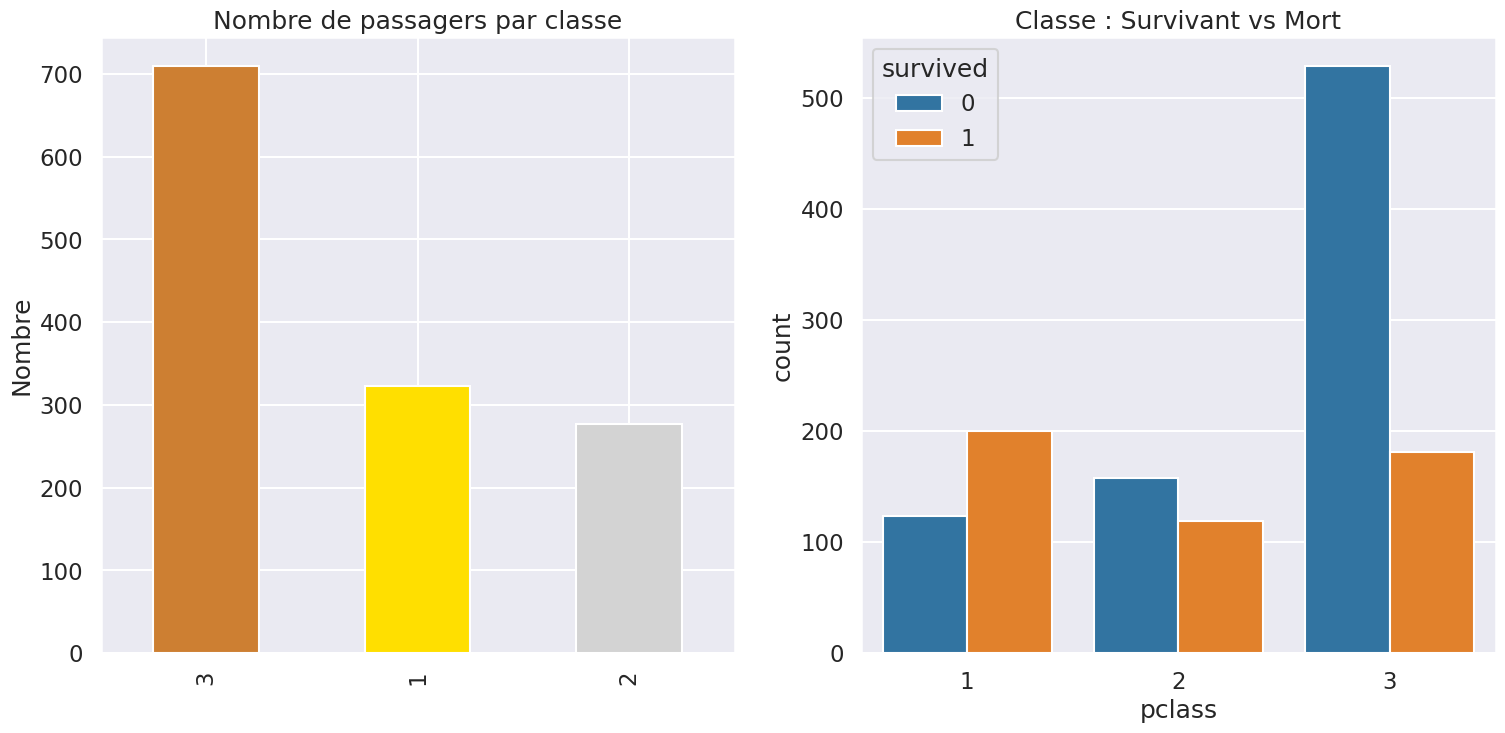

In [217]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Nombre de passagers par classe')
ax[0].set_ylabel('Nombre')
sns.countplot(x='pclass',hue='survived',data=data,ax=ax[1])
ax[1].set_title('Classe : Survivant vs Mort')
plt.show()

<blockquote><strong><em><h5> 
a) Il y avait plus de passagers en 3éme classe que dans la seconde et première classe réunies.<br>
b) Il n'y a que dans la première classe où la probabilité de survie etait supèrieure à celle de la mort.<br>
c) Si vous étiez en 3éme classe probabilité de survivre au nauffage était seulement de 25% environ.
</strong></em></h5></blockquote>


In [218]:
pd.crosstab([data.sex,data.survived],data.pclass,margins=True).style.background_gradient(cmap='summer_r')

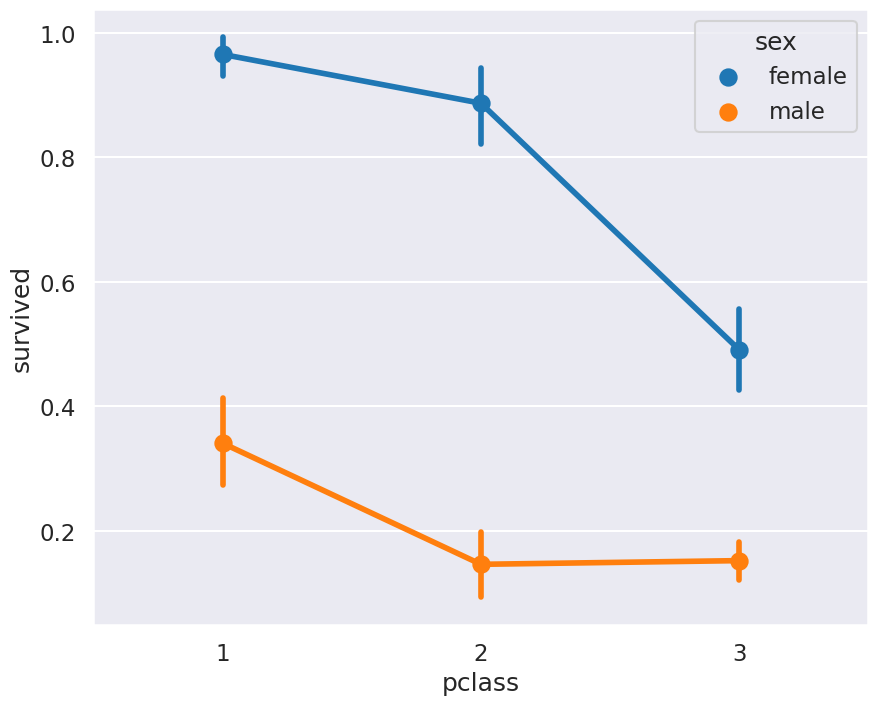

In [219]:
fig, ax = plt.subplots(figsize=(10,8))
sns.pointplot(x='pclass',y='survived',hue='sex',data=data, ax=ax)
plt.show()

<blockquote><strong><em><h5>
a) On visualise bien sur cette exemple que quasiment toutes les femmes de première classe ont survécu.<br>
b) Les femmes de la 3éme classe n'avaient que 50% de probabilité de s'en sortir<br>
c) Les hommes ont, de manière générale, beaucoup moins de chance de survie, les hommes de première classe ont survécu à hauteur de 35% et ceux de la 2nd et 3éme classe à peine 15%.</strong></em></h5></blockquote>
<h4><div id="3d"><u>d) En fonction de l'age :</u></div></h4>


In [220]:
print('Le plus agé :',round(data['age'].max(),2),'ans')
print('Le plus jeune :',round(data['age'].min(),2),'ans')
print('L\'age moyen sur le Titanic :',round(data['age'].mean(),2),'ans')

Le plus agé : 80.0 ans
Le plus jeune : 0.17 ans
L'age moyen sur le Titanic : 30.08 ans


In [221]:
pd.crosstab([data.initial,data.survived],data.pclass,margins=True).style.background_gradient(cmap='summer_r')

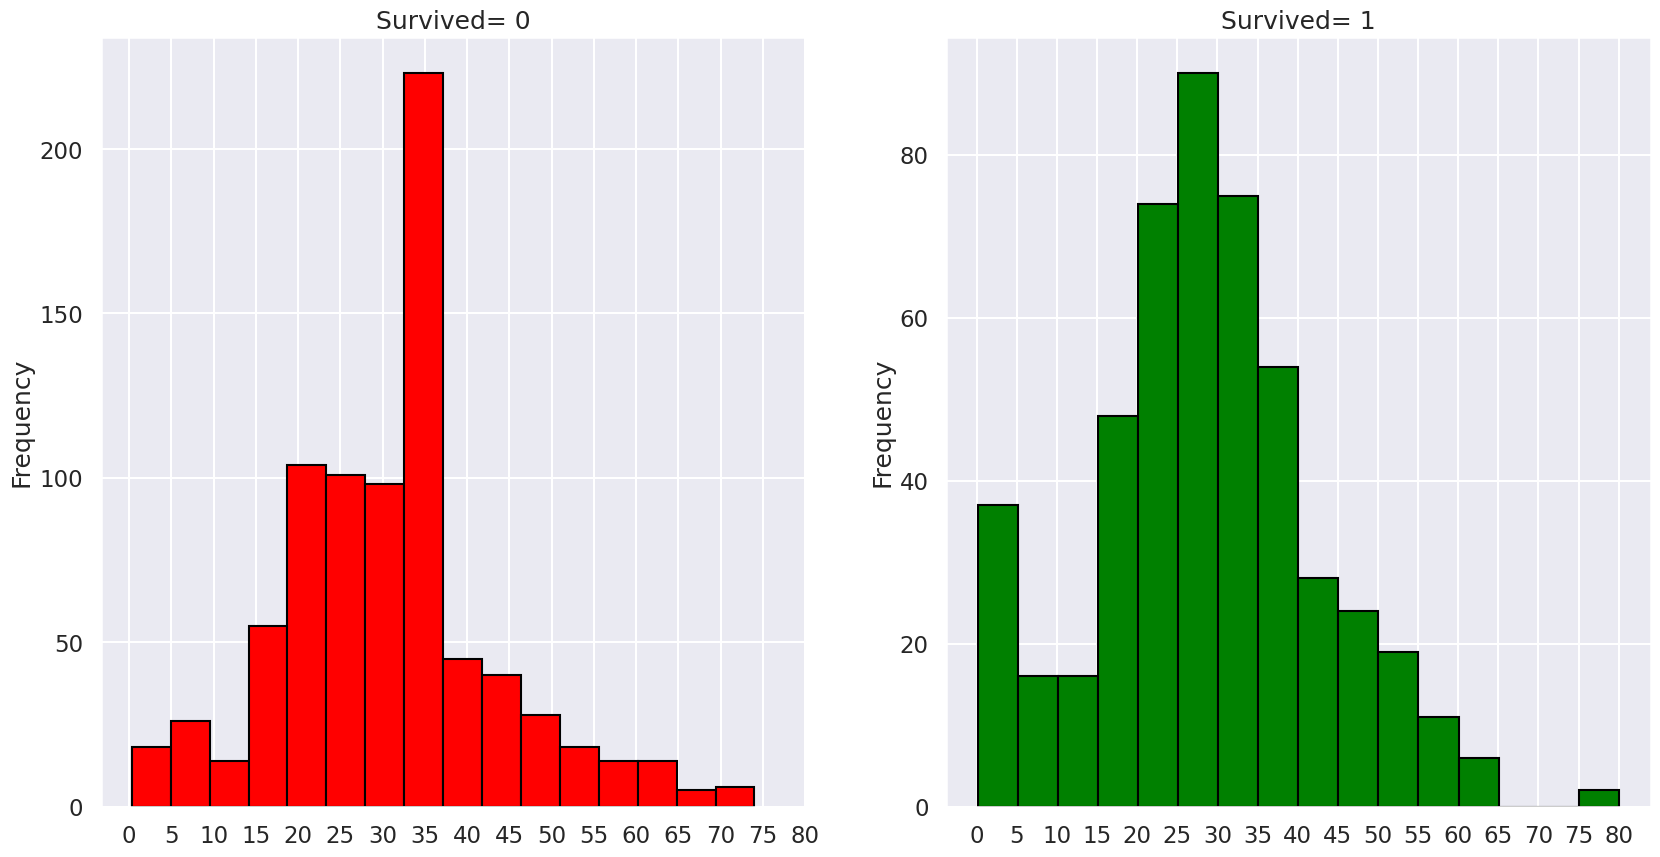

In [222]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['survived']==0].age.plot.hist(ax=ax[0],bins=16,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['survived']==1].age.plot.hist(ax=ax[1],color='green',bins=16,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

# Visualisation par tranche d'age de 5 années (age maxi / 5) => 80/5 =16

<blockquote><strong><em><h5>
a) Les pics proviennent du fait d'avoir assigné une valeur moyenne sur les ages manquant plutôt qu'une valeur aléatoire comprise dans l'écart interquartile.<br>
b) Les enfants de moins de 5 ans avaient plus de chances de survie ainsi que les personnes de 75 à 80.
c) Sur ce graphique il n'est pas évidant non plus de tirer des conclusions étant donné la différence d'echelle </strong></em></h5></blockquote>



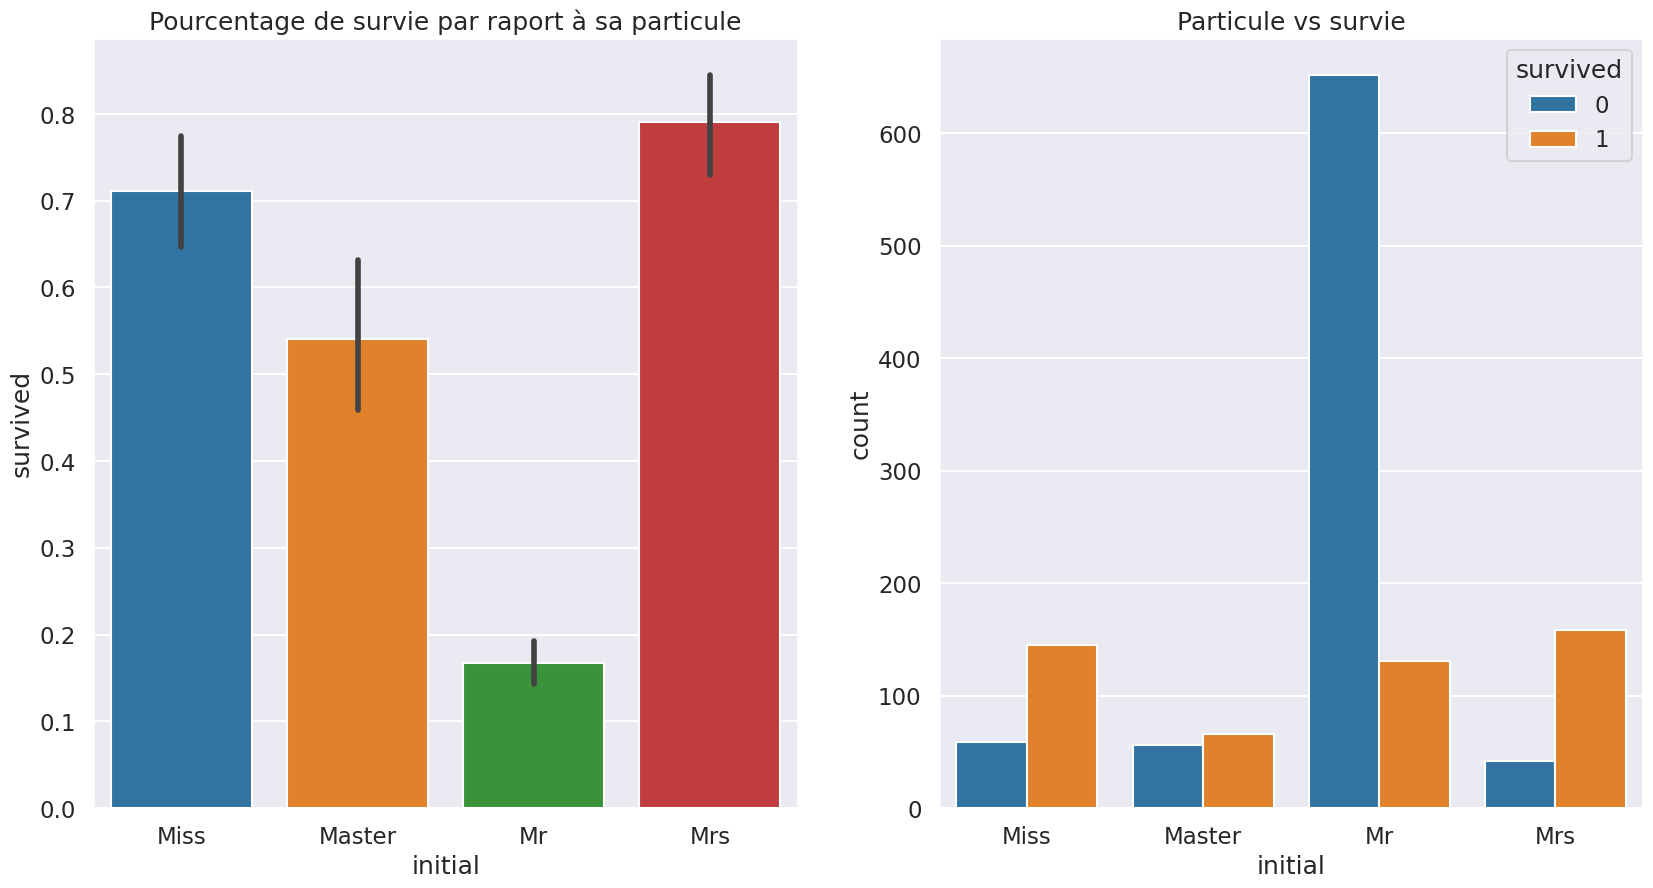

In [223]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x='initial',y='survived',data=data,ax=ax[0])
ax[0].set_title('Pourcentage de survie par raport à sa particule')
sns.countplot(x='initial',hue='survived',data=data,ax=ax[1])
ax[1].set_title('Particule vs survie')
plt.show()

<blockquote><strong><em><h5>
Avec la modification effectué sur le titre des passager on remarque plusieures choses :<br><br><blockquote>
a) Les enfants (<= à 15 ans) avaient une chance de survie d'environ  50% ?!<br>
b) Les hommes (> à 15 ans) seulement 18%. 652 hommes sur 783 n'ont pas survécu.<br>
c) Les femmes (> à 15 ans) entre 70 et 80%</strong></em></h5></blockquote></blockquote>



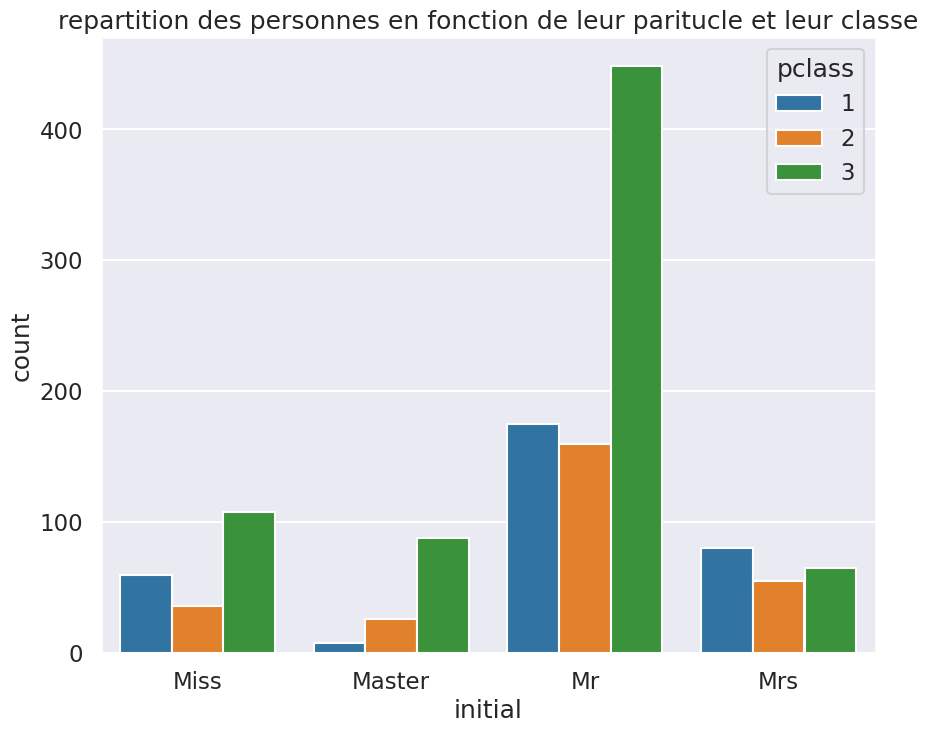

In [224]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='initial',hue='pclass',data=data, ax=ax)
ax.set_title('repartition des personnes en fonction de leur paritucle et leur classe')
plt.show()

<blockquote><strong><em><h5>
Les enfants étaient majoritairement en 3éme classe ce qui explique le faible taux de survie.</strong></em></h5></blockquote>
<h4><div id="3e"><u>e) Par port d'embacation :</u></div></h4>

In [225]:
pd.crosstab([data.embarked,data.pclass],[data.sex,data.survived],margins=True).style.background_gradient(cmap='summer_r')

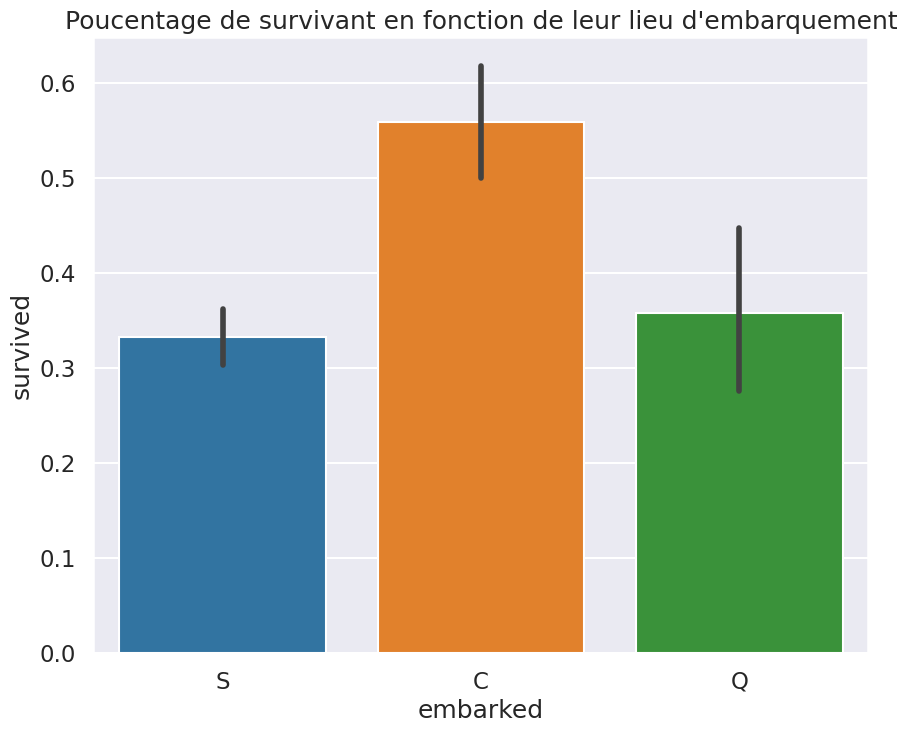

In [226]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='embarked',y='survived',data=data)
ax.set_title('Poucentage de survivant en fonction de leur lieu d\'embarquement')
plt.show()

<blockquote><strong><em><h5>
Les passagers de partant de cherbourg ont eu un taux de survie supérieur aux autres, cela est dûe au fait que plus de la moitié ont embarqué en en première classe et que plus de la moitié était aussi des femmes.</strong></em></h5></blockquote>

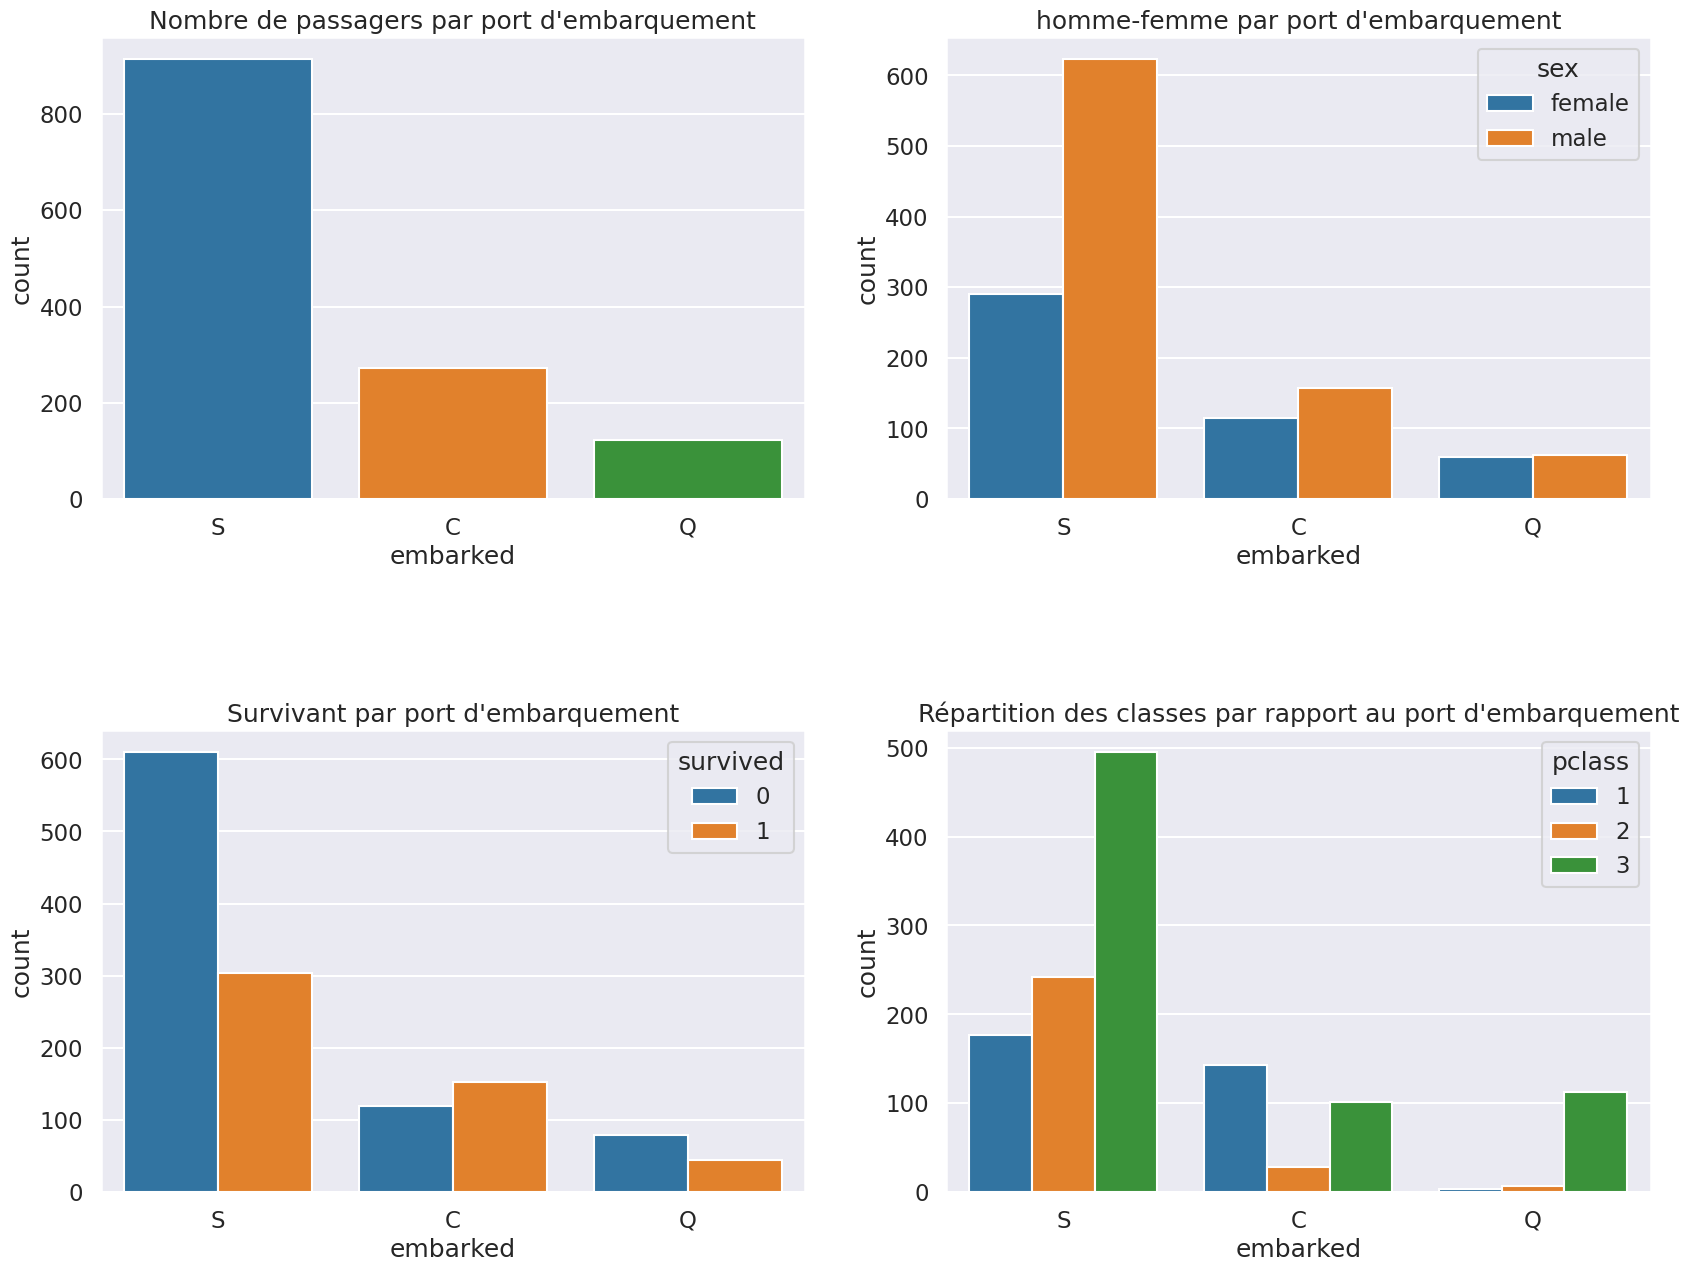

In [227]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('Nombre de passagers par port d\'embarquement')
sns.countplot(x='embarked',hue='sex',data=data,ax=ax[0,1])
ax[0,1].set_title('homme-femme par port d\'embarquement')
sns.countplot(x='embarked',hue='survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Survivant par port d\'embarquement')
sns.countplot(x='embarked',hue='pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Répartition des classes par rapport au port d\'embarquement')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

<blockquote><strong><em><h5>
Avec ces 4 graphiques on peut déduire que :<br><br><blockquote>
a) La majorité des passagers ont embarqués à Southampton et que les 2/3 de ces passagers étaient des hommes.<br>
b) Les passagers de Queenstown étaient en 3éme classe avec une égalité homme-femme et seulement 1/3 a survécu.<br>
</strong></em></h5></blockquote></blockquote>



/home/kevin/workspace/py-sql/.venv/lib/python3.8/site-packages/seaborn/categorical.py:3024: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


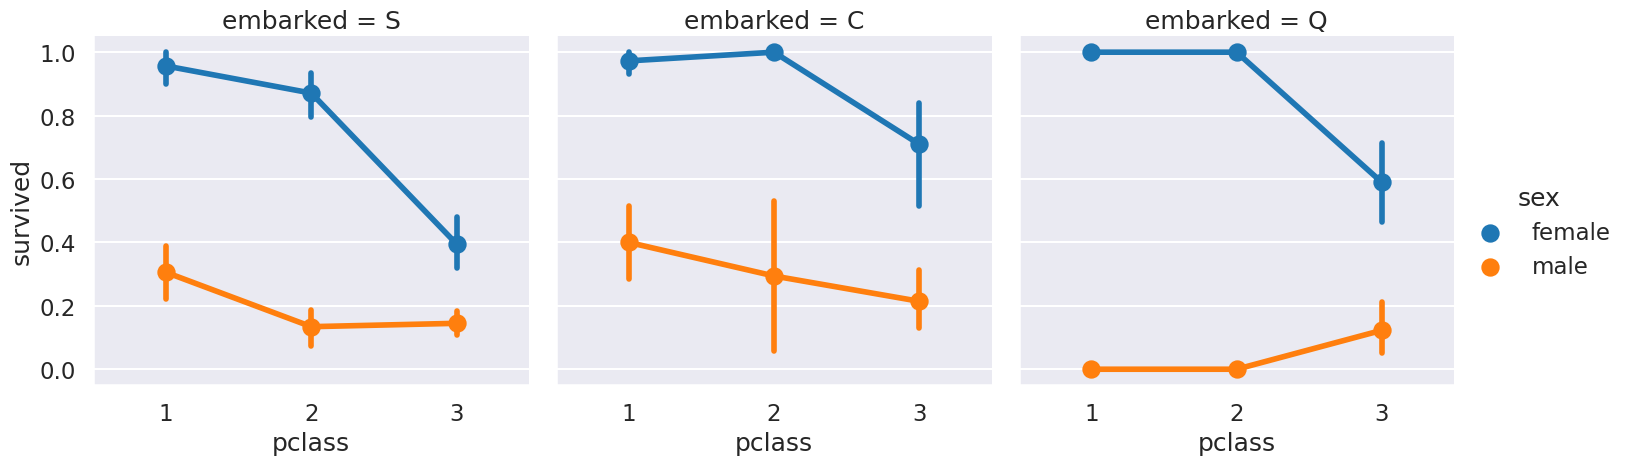

In [228]:
sns.catplot(x='pclass',y='survived',hue='sex',col='embarked',data=data, kind="point",ax=ax)
plt.show()

<blockquote><strong><em><h5>3 choses de visible sur ce graphique :<br><br><blockquote>
a) globalement plus on descend en classe plus la chance de survie diminue<br>
b) Les femmes de 1ére et 2nd classe ont quasiment toutes étaient souvées.<br>
    c) Les hommes de Southampton et Quennstone ont eu moins de chances que ceux de Cherbourg.</blockquote></h5></em></strong></blockquote>
    <h4><div id="3f"><u>f) Les fréres et soeurs et conjoints:</u></div></h4>

In [229]:
pd.crosstab([data.sibsp],data.survived).style.background_gradient(cmap='summer_r')

survived,0,1
sibsp,,
0,582,309
1,156,163
2,23,19
3,14,6
4,19,3
5,6,0
8,9,0


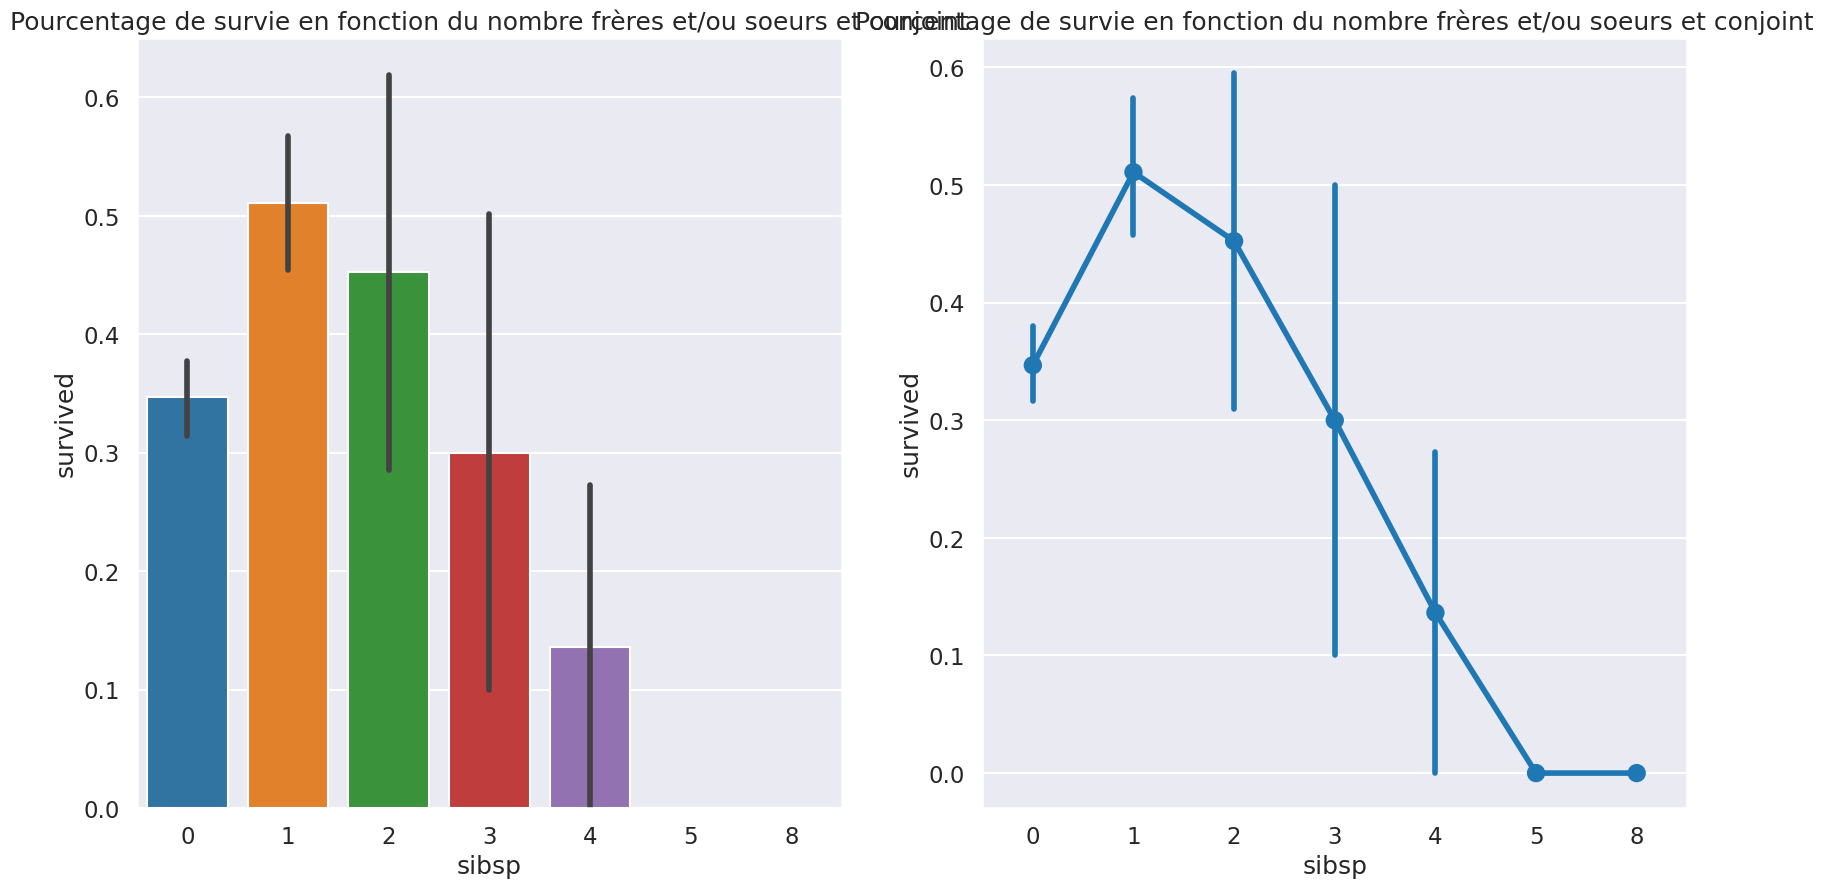

In [230]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x='sibsp',y='survived',data=data,ax=ax[0])
ax[0].set_title('Pourcentage de survie en fonction du nombre frères et/ou soeurs et conjoint')
sns.pointplot(x='sibsp',y='survived',data=data,ax=ax[1])
ax[1].set_title('Pourcentage de survie en fonction du nombre frères et/ou soeurs et conjoint')
plt.show()

In [231]:
pd.crosstab(data.sibsp,data.pclass).style.background_gradient(cmap='summer_r')

pclass,1,2,3
sibsp,,,
0,198,182,511
1,113,82,124
2,8,12,22
3,4,1,15
4,0,0,22
5,0,0,6
8,0,0,9


<em><h5><blockquote>
a) Si on est sans frères et/ou soeurs les chances de survies sont d'environ 35%<br>
b) Plus on a de fréres soeurs ou conjoint plus la chances de survie diminue surement dû au fait de vouloir sauver sa famille plutôt que soit mmême<br>
c) Les familles de plus de 5 membres n'ont pas survécue car elles étaient toutes en 3éme classe.</blockquote></h5></em>
 <h4><div id="3g"><u>g) Parents et enfants:</u></div></h4>

In [232]:
pd.crosstab(data.parch,data.pclass).style.background_gradient(cmap='summer_r')

pclass,1,2,3
parch,,,
0,242,206,554
1,50,43,77
2,27,25,61
3,2,3,3
4,2,0,4
5,0,0,6
6,0,0,2
9,0,0,2


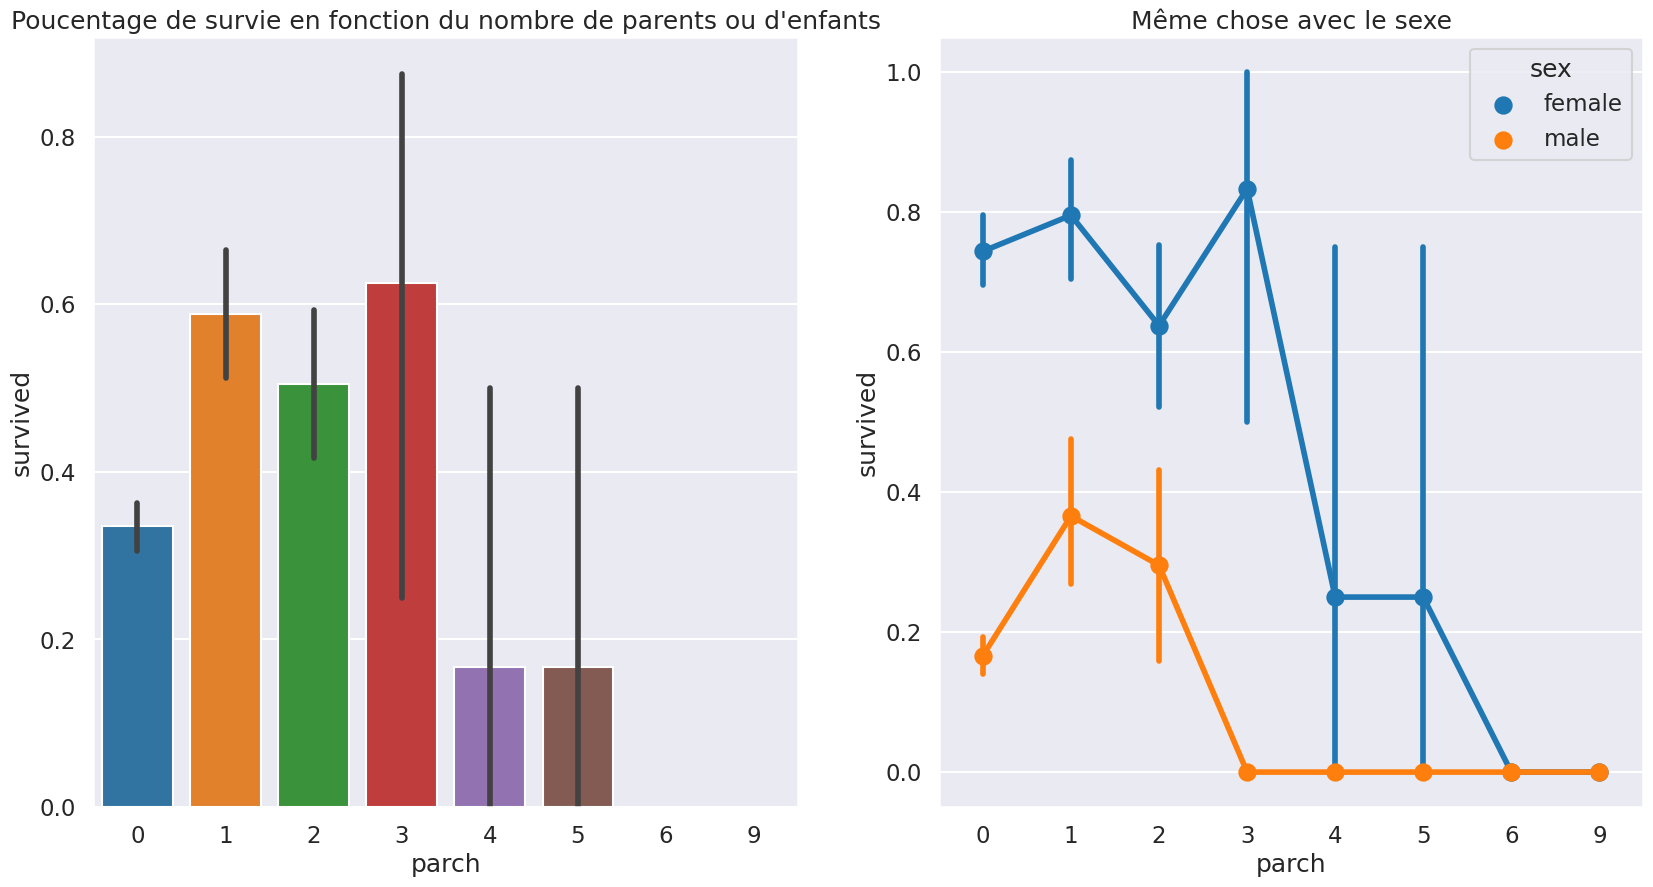

In [233]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x='parch',y='survived',data=data,ax=ax[0])
ax[0].set_title('Poucentage de survie en fonction du nombre de parents ou d\'enfants')
sns.pointplot(x='parch',y='survived',data=data,hue="sex",ax=ax[1])
ax[1].set_title('Même chose avec le sexe')
plt.show()

<em><h5><blockquote>
C'est sensiblement les mêmes observations que précedemment, si on est sans anfant ou sans parent la probabilité de survie est de 35% et plus on est nombreux plus la chance de survie diminue. Les personnes seules étaient majoritairement en 3éme classe ainsi que les familles nombreuse.</blockquote></h5></em><br>
    <h4><div id="3h"><u>h) De célibataires à la plus grande famille :</u></div></h4>

In [234]:
data['remy']=0
for i in data:
    data['remy']=data.sibsp + data.parch
    
pd.crosstab([data.remy,data.sex],data.pclass).style.background_gradient(cmap='summer_r')

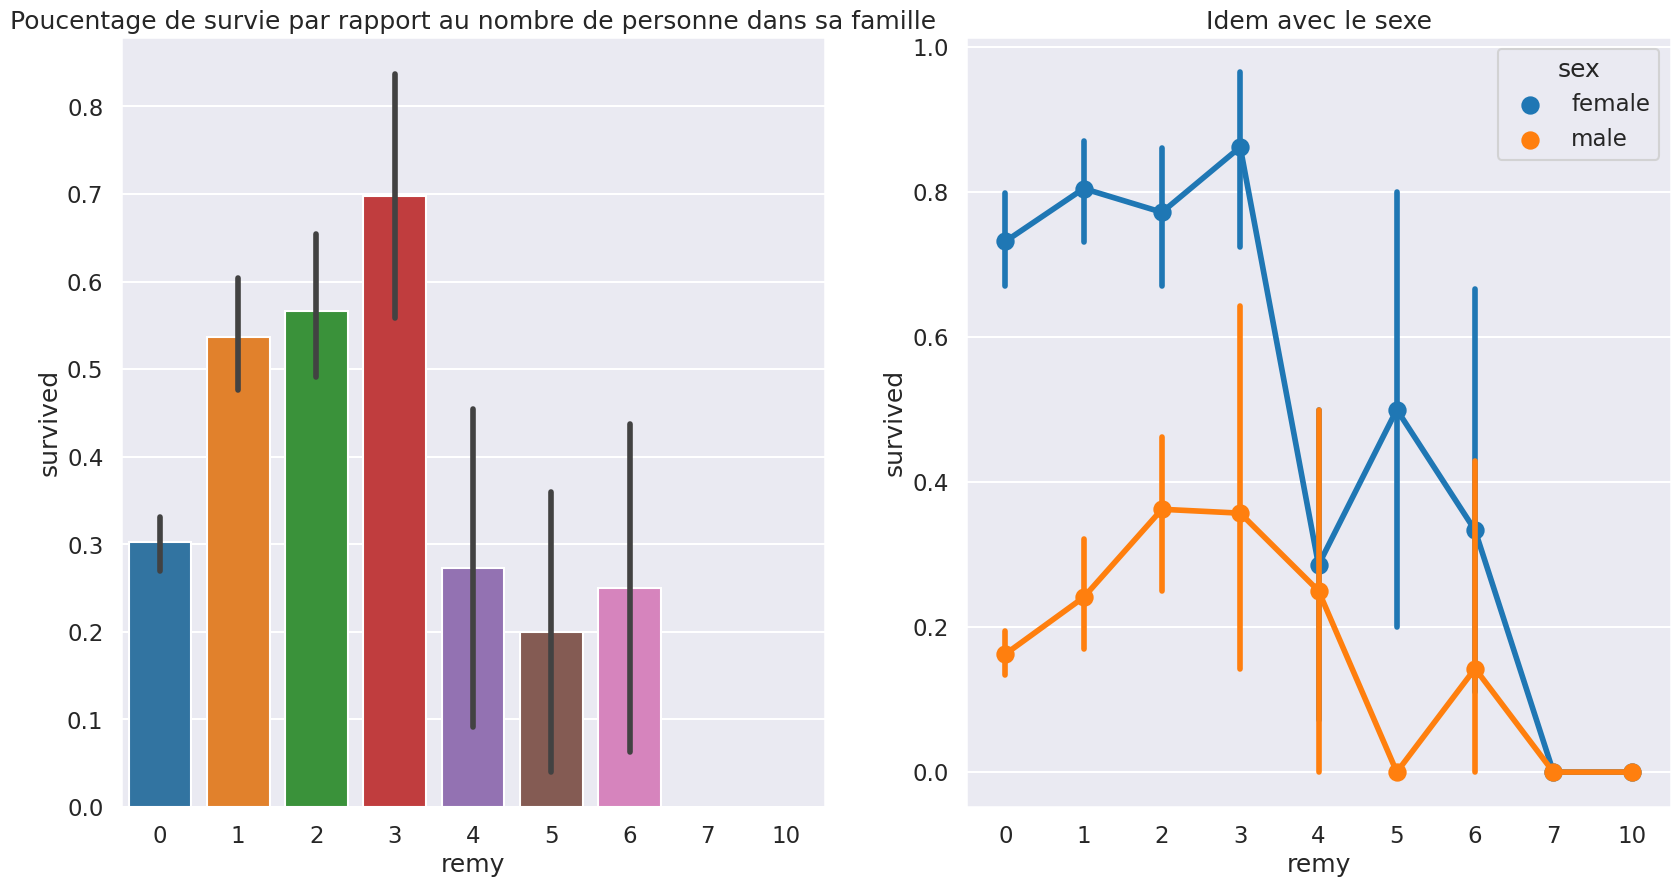

In [235]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x='remy',y='survived',data=data,ax=ax[0])
ax[0].set_title('Poucentage de survie par rapport au nombre de personne dans sa famille')
sns.pointplot(x='remy',y='survived',hue="sex",data=data,ax=ax[1])
ax[1].set_title('Idem avec le sexe')
plt.show()

<em><h5><blockquote>
Les chances de survie augmente de célibataire à une famille de 4 personnes mais à partir d'une famille de 5 personnes les chances de survie diminuent drastiquement. Car les familles de plus de 4 meembres étaient principalement en 3éme classe. La famille la plus nombreuse était composée de 5 femmes et 6 hommes :</blockquote></h5>


In [236]:
data.loc[data.remy==10,:]

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,initial,remy
1170,3,0,"Sage, Master. Thomas Henry",male,6.00,8,2,69.55,S,Master,10
1171,3,0,"Sage, Master. William Henry",male,14.50,8,2,69.55,S,Master,10
1172,3,0,"Sage, Miss. Ada",female,5.48,8,2,69.55,S,Master,10
1173,3,0,"Sage, Miss. Constance Gladys",female,5.48,8,2,69.55,S,Master,10
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,5.48,8,2,69.55,S,Master,10
1175,3,0,"Sage, Miss. Stella Anna",female,5.48,8,2,69.55,S,Master,10
1176,3,0,"Sage, Mr. Douglas Bullen",male,33.00,8,2,69.55,S,Mr,10
1177,3,0,"Sage, Mr. Frederick",male,33.00,8,2,69.55,S,Mr,10
1178,3,0,"Sage, Mr. George John Jr",male,33.00,8,2,69.55,S,Mr,10
1179,3,0,"Sage, Mr. John George",male,33.00,1,9,69.55,S,Mr,10


<em><h5><blockquote>
Mr et Mrs Sage et leurs 9 enfants n'ont pas survécu.</blockquote></h5>

<h4><div id="3i"><u>i) Prix du ticket :</u></div></h4>

In [237]:
print('Le plus cher:',data['fare'].max())
print('Le moins cher:',data['fare'].min())
print('Prix moyen d\'un ticket:',data['fare'].mean())

Le plus cher: 512.3292
Le moins cher: 0.0
Prix moyen d'un ticket: 33.2802038961039


<em><h5><blockquote>
Le prix évolu entre 0 et 512 !<br>
</blockquote></h5>


In [238]:
print(data.loc[data.fare==0,].shape[0],'personnes ont eu un ticket gratuit, seulement',data.loc[(data.fare==0)&(data.survived==1),:].shape[0],'ont survécu.')
print("Un cadeau empoisonné!!!")

17 personnes ont eu un ticket gratuit, seulement 2 ont survécu.
Un cadeau empoisonné!!!


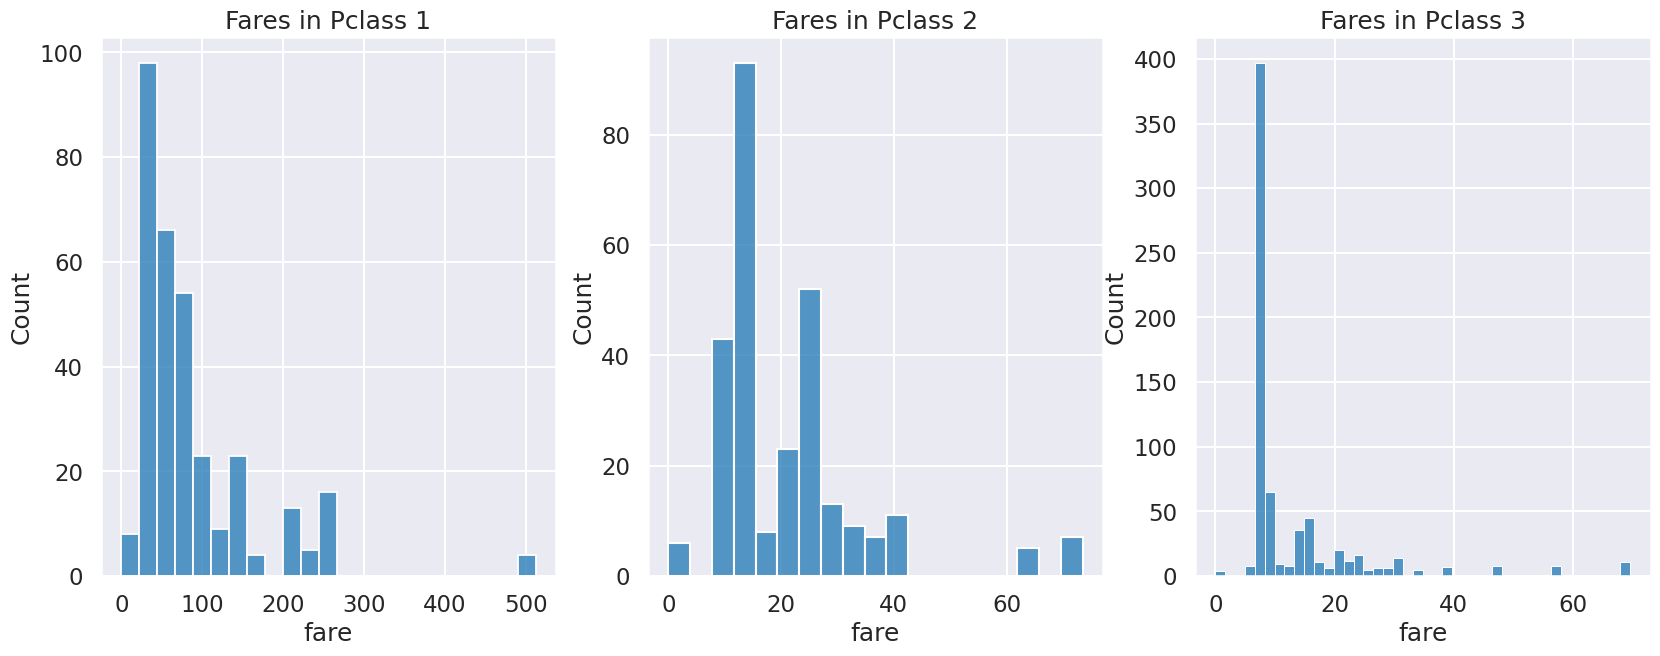

In [239]:
f,ax=plt.subplots(1,3,figsize=(20,7))
sns.histplot(data[data['pclass']==1].fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.histplot(data[data['pclass']==2].fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.histplot(data[data['pclass']==3].fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()


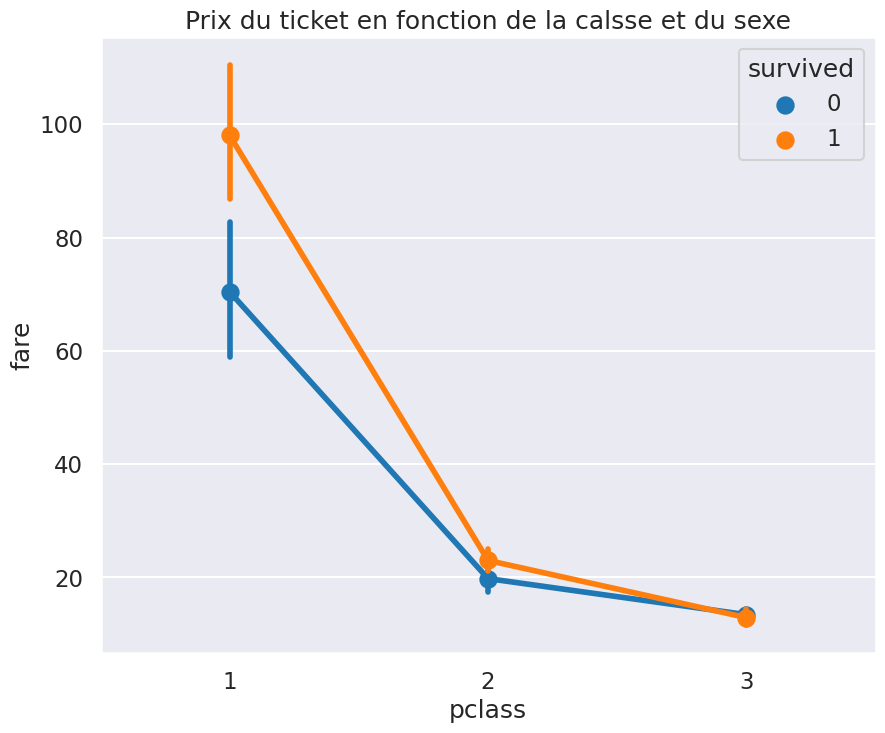

In [240]:
fig, ax = plt.subplots(figsize=(10,8))
sns.pointplot(x='pclass',y='fare',hue="survived",data=data,ax=ax)
ax.set_title('Prix du ticket en fonction de la calsse et du sexe')
plt.show()

<strong><h5> 
a) En premiére classe il y a une large étendu des prix contrairement à la 2nd et 3éme classe.<br>
b) Plus on payait cher son ticket en première classe plus les chances de survie étaient élevées.<br>
c) Il n'y a pas l'air d'avoir une grande différence de prix entre la seconde et la troisième classe et la différence de prix n'a pas une grnade inscidence sur la survie.<br><br>
Nous allons utiliser pour cette étude la fonction qcut de pandas qui va nous permettre de regouper les prix des tickets en 4 groupes. </h5></strong>

In [241]:
data['Fare_Range']=pd.qcut(data['fare'],4)
data.groupby(['Fare_Range'])['survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,survived
Fare_Range,
"(-0.001, 7.896]",0.228487
"(7.896, 14.454]",0.283489
"(14.454, 31.275]",0.435976
"(31.275, 512.329]",0.585139


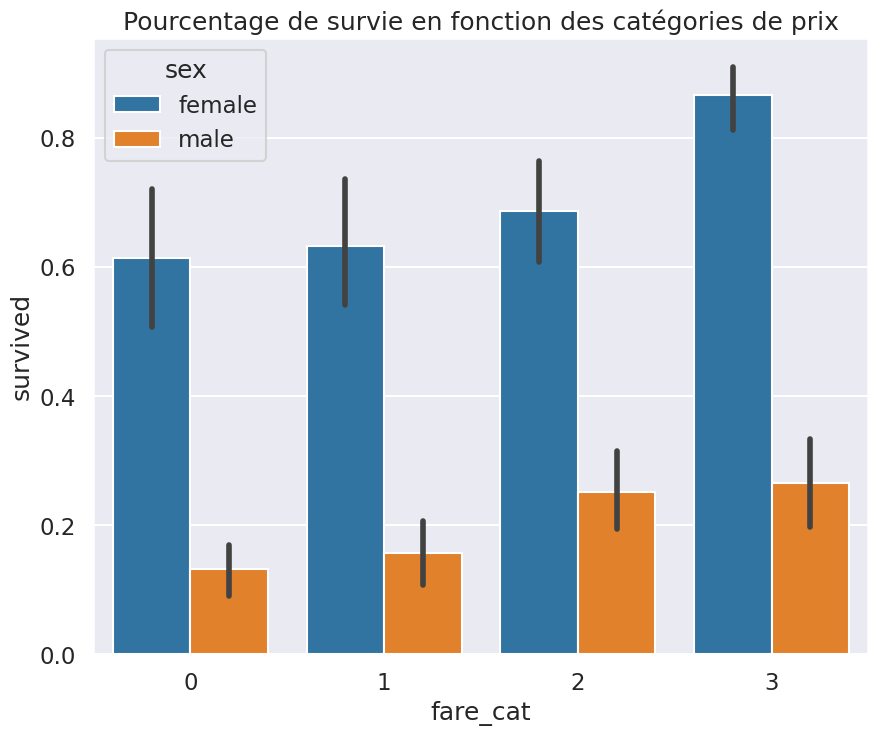

In [242]:
data['fare_cat']=0
data.loc[data['fare']<=7.896,'fare_cat']=0
data.loc[(data['fare']>7.91)&(data['fare']<=14.454),'fare_cat']=1
data.loc[(data['fare']>14.454)&(data['fare']<=31.275),'fare_cat']=2
data.loc[(data['fare']>31)&(data['fare']<=512.329),'fare_cat']=3

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='fare_cat',y='survived',data=data,hue='sex',ax=ax)
ax.set_title('Pourcentage de survie en fonction des catégories de prix')
plt.show()

<em><h5><blockquote>
Sous cet angle on visualise mieux que les chance de survie augmente en même temps que le prix du ticket.</blockquote></h5>


<h4><strong><div id="4">4 : Conclusions </div> </strong></h4>
<h5>
<blockquote><u><strong>Sexe :</strong></u> Les chances de survie étaient nettement supérieur si on était de sexe féminin.</blockquote><br>
<blockquote><u><strong>La classe :</strong></u> Les chances de survie étaient supérieure en 1ére classe, quasiment de 1pour1 pour les femmes.En 2nd classe les chances de survies commencent à diminuer mais reste largement supérieure à la 2nd classe.</blockquote><br>
<blockquote><u><strong>L'age :</strong></u> Les enfants de moins de 15 ans avaient une chance sur deux de s'en sortir. Si vous étiez un hommes de plus de 15 ans les chances de survie étaient à peine de 19%.</blockquote><br>
<blockquote><u><strong>Le port d'embarcation :</strong></u> Les chances de survie étaient meilleure si vous aviez embarqué à Cherbourg. Cela vient du fait que la moitié des passagers de Cherbourg ont embarqué en 1ére classe. Les passagers de Queenstone avaient moins de chance de survie car ils étaient trés largement en 3éme classe.</blockquote><br>
<blockquote><u><strong>Les familles :</strong></u> De célibataire à une famille de 4 personnes les chances de survie augmente. Au-delà de 4 les chances de survie chutaient entre 20 et 25%.</blockquote><br>



</h5>

<h4><div id="5"><strong>5 : Correlation entre les variables  </strong></div></h4>

/tmp/ipykernel_439/2116377231.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix


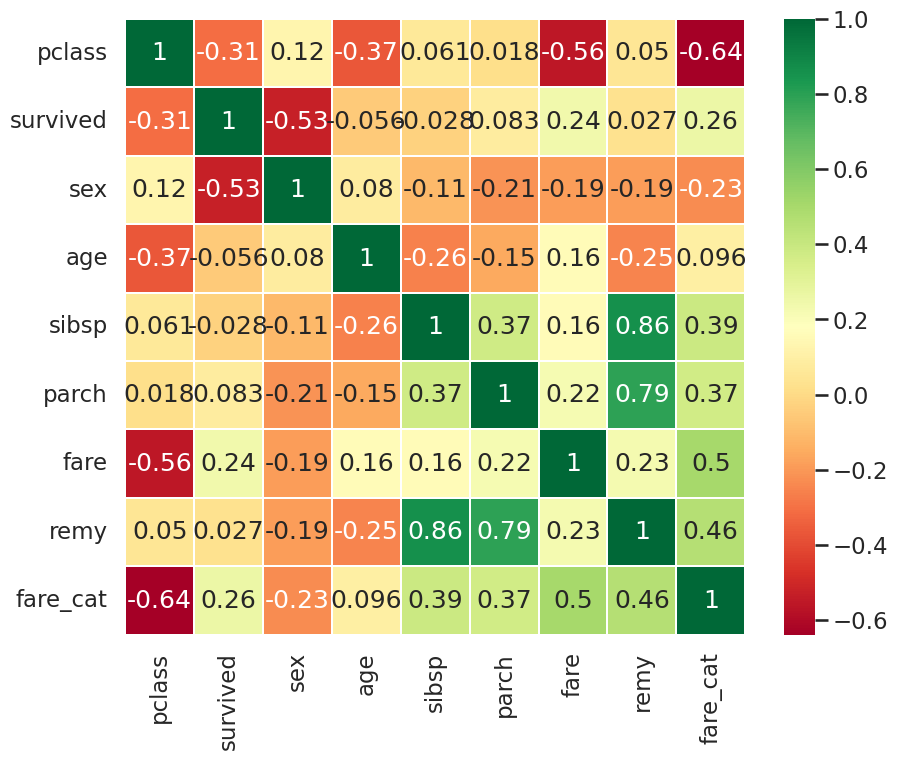

In [243]:
data['sex'].replace(['male','female'],[1,0],inplace=True)

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<em><h5><blockquote>
Les variables les plus corrélées avec la survie sont :<br>
<p STYLE="padding:0 0 0 20px;">1 - Le sexe -0.53</p>
<p STYLE="padding:0 0 0 20px;">2 - La classe -0.31</p>
<p STYLE="padding:0 0 0 20px;">3 - Le prix du ticket 0.24</p>
<p STYLE="padding:0 0 0 20px;">4 - Parents enfants 0.083 </p>
<p STYLE="padding:0 0 0 20px;">5 - L'age 0.056 </p>

</blockquote></h5>
